<a href="https://colab.research.google.com/github/madhava5012001/Concrete-Image-Classification2/blob/main/vehicles%20detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import torchvision
from sklearn.preprocessing import normalize
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score, confusion_matrix


In [3]:
# Set the paths to your train and test directories
train_data_dir = '/content/drive/MyDrive/assign_classification/train'
test_data_dir = '/content/drive/MyDrive/assign_classification/test'

In [4]:
# Define data transformations with augmentation
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [5]:
test_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


In [6]:
# Load the datasets using ImageFolder
train_dataset = datasets.ImageFolder(train_data_dir, transform=train_transform)
test_dataset = datasets.ImageFolder(test_data_dir, transform=test_transform)

In [7]:
# Create data loaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [33]:
class ResNetModel(nn.Module):
    def __init__(self, num_classes):
        super(ResNetModel, self).__init__()
        self.resnet = models.resnet50(pretrained=True)

        # Modify the last layer for your specific classification task
        in_features = self.resnet.fc.in_features
        self.resnet.fc = nn.Linear(in_features, num_classes)

    def forward(self, x):
        return self.resnet(x)

# Instantiate the model
num_classes = len(train_dataset.classes)
model = ResNetModel(num_classes)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [34]:
# Instantiate the ResNetModel
num_classes = 3  # Replace with the actual number of classes in your task
model = ResNetModel(num_classes)

In [19]:
# Set all layers as non-trainable
for param in model.parameters():
    param.requires_grad = False

In [35]:
model.resnet.fc.requires_grad = True

In [36]:
num_classes = len(train_dataset.classes)


print(train_dataset.classes)
print(len(train_dataset))

['bike', 'car', 'others']
120


In [27]:
if any(param.requires_grad for param in model.parameters()):
    # Define loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.0001)

In [28]:
# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

ResNetModel(
  (resnet): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
       

In [29]:
# Add learning rate scheduler
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)


In [37]:
# Check if the model has learnable parameters
if any(param.requires_grad for param in model.parameters()):
    # Define loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.0001)

    # Move the model to GPU if available
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    # Add learning rate scheduler
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

    # Training loop
    num_epochs = 10

    for epoch in range(num_epochs):
        model.train()
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        # Adjust learning rate
        scheduler.step()

        print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item():.4f}')
else:
    print("Model has no learnable parameters.")


Epoch 1/10, Loss: 0.7755
Epoch 2/10, Loss: 0.5244
Epoch 3/10, Loss: 0.2232
Epoch 4/10, Loss: 0.3502
Epoch 5/10, Loss: 0.1150
Epoch 6/10, Loss: 0.2169
Epoch 7/10, Loss: 0.1482
Epoch 8/10, Loss: 0.1058
Epoch 9/10, Loss: 0.2238
Epoch 10/10, Loss: 0.0520


In [56]:
inputs = inputs.to(device)

# Inside your get_predictions function, make sure to move the model and inputs to the same device
def get_predictions(loader):
    all_preds = []
    all_probs = []

    with torch.no_grad():
        for inputs, labels in loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            # Get probabilities for all classes
            probabilities = torch.nn.functional.softmax(outputs, dim=1).cpu().numpy()  # Directly convert to NumPy
            _, predicted = torch.max(outputs.data, 1)
            all_preds.extend(predicted.cpu().numpy())
            all_probs.extend(probabilities)

    return all_preds, all_probs

In [40]:
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [61]:
# True labels
true_labels = np.array(test_loader.dataset.targets)

In [62]:
predictions, probabilities = get_predictions(test_loader)


In [63]:
probabilities = np.array(probabilities)
probabilities

array([[9.9550581e-01, 1.1478609e-03, 3.3463838e-03],
       [9.9913728e-01, 3.5231264e-04, 5.1033200e-04],
       [9.8287374e-01, 1.3739812e-02, 3.3864735e-03],
       [9.9318486e-01, 2.4384367e-03, 4.3767863e-03],
       [9.9982673e-01, 8.8644709e-05, 8.4653722e-05],
       [9.9687564e-01, 1.5756919e-03, 1.5487241e-03],
       [5.9279196e-02, 5.4741476e-02, 8.8597929e-01],
       [9.9176735e-01, 4.8228693e-03, 3.4097610e-03],
       [9.9888939e-01, 3.7235548e-04, 7.3822920e-04],
       [9.9852437e-01, 2.3465154e-04, 1.2409918e-03],
       [6.0573703e-04, 9.9855071e-01, 8.4355869e-04],
       [2.6606258e-03, 9.9157625e-01, 5.7630911e-03],
       [9.1230671e-04, 9.9800235e-01, 1.0853879e-03],
       [2.9040274e-04, 9.9934834e-01, 3.6123648e-04],
       [6.5625261e-04, 9.9862528e-01, 7.1850634e-04],
       [4.0335566e-04, 9.9918455e-01, 4.1207124e-04],
       [1.3240875e-04, 9.9972922e-01, 1.3840791e-04],
       [1.3788716e-03, 9.9705446e-01, 1.5666798e-03],
       [9.5141307e-02, 3.968

In [64]:
predictions = np.array(predictions)
predictions

array([0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2,
       2, 2, 2])

In [65]:
# Get class indices for the classes in the dataset
class_indices = [train_dataset.class_to_idx[class_name] for class_name in train_dataset.classes]
class_indices

[0, 1, 2]

In [66]:
# Modify probabilities array to include only the classes present in the dataset
probabilities_for_classes = probabilities[:, class_indices]

In [67]:
# Normalize probabilities to ensure they sum up to 1.0 over classes
probabilities_for_classes = normalize(probabilities_for_classes, axis=1, norm='l1')


In [70]:

# Calculate ROC AUC for the three classes
roc_auc = roc_auc_score(true_labels, probabilities_for_classes, multi_class='ovr')

In [71]:
# Confusion Matrix
conf_matrix = confusion_matrix(true_labels, predictions)
conf_matrix

array([[9, 0, 1],
       [0, 9, 1],
       [0, 0, 5]])

In [68]:

# Calculate accuracy
accuracy = accuracy_score(true_labels, predictions)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Test Accuracy: 92.00%


In [74]:
# Generate a classification report
class_report = classification_report(true_labels, predictions, target_names=train_dataset.classes)

# Print the classification report
print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

        bike       1.00      0.90      0.95        10
         car       1.00      0.90      0.95        10
      others       0.71      1.00      0.83         5

    accuracy                           0.92        25
   macro avg       0.90      0.93      0.91        25
weighted avg       0.94      0.92      0.92        25



In [82]:
# Save the trained model
torch.save(model.state_dict(), 'Vehicle classification.pth')


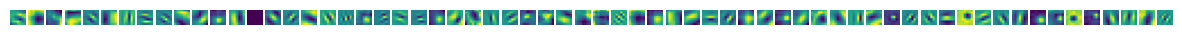

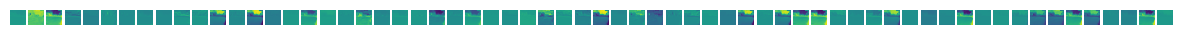

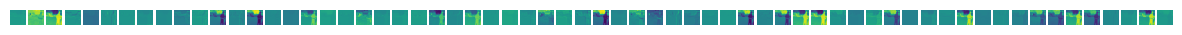

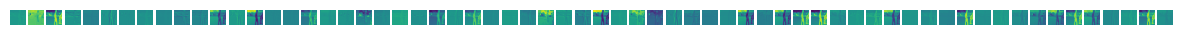

In [97]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision import models
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Load a pre-trained model (e.g., ResNet50)
model = models.resnet50(pretrained=True)
model.eval()

# Define a function to visualize filters in a given layer
def visualize_filters(model, layer_num):
    # Check if the layer is the initial convolution block
    if layer_num == 0:
        layer = model.conv1
    else:
        layer = model.layer4[layer_num - 1].conv2

    # Extract the weights (filters) from the layer
    filters = layer.weight.data.cpu().numpy()

    # Normalize filters for visualization
    filters = (filters - filters.min()) / (filters.max() - filters.min())

    # Plot the filters
    n_filters = filters.shape[0]
    fig, axes = plt.subplots(1, n_filters, figsize=(15, 5))
    for i in range(n_filters):
        axes[i].imshow(filters[i, 0, :, :], cmap='viridis')
        axes[i].axis('off')
    plt.show()

# Define a function to visualize feature maps for a given layer
def visualize_feature_maps(model, layer_num, img_path):
    # Load and preprocess the image
    img = Image.open(img_path).convert('RGB')
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    img_tensor = transform(img).unsqueeze(0)

    # Get the specified layer
    if layer_num == 0:
        layer = model.conv1
    else:
        layer = model.layer4[layer_num - 1].conv2

    # Register a forward hook to get the feature maps
    activation = {}
    def hook(module, input, output):
        activation['value'] = output.detach()
    hook_handle = layer.register_forward_hook(hook)

    # Forward pass to get the feature maps
    with torch.no_grad():
        model(img_tensor)

    # Remove the hook
    hook_handle.remove()

    # Extract the feature maps
    feature_maps = activation['value'].squeeze().cpu().numpy()

    # Plot the feature maps
    n_feature_maps = feature_maps.shape[0]
    fig, axes = plt.subplots(1, n_feature_maps, figsize=(15, 5))
    for i in range(n_feature_maps):
        axes[i].imshow(feature_maps[i, :, :], cmap='viridis')
        axes[i].axis('off')
    plt.show()

# Example usage:
# Visualize filters in the initial convolution block
visualize_filters(model, layer_num=0)

# Visualize feature maps for the initial convolution block using example images
img_path_class_1 = '/content/drive/MyDrive/assign_classification/train/bike/pfva_dataset_file_G_18082023_125843_8.jpg'   # Image actual path of each class
img_path_class_2 = '/content/drive/MyDrive/assign_classification/train/car/pfva_dataset_file_G_18082023_125843_19.jpg'  # Image actual path of each class
img_path_class_3 = '/content/drive/MyDrive/assign_classification/train/others/pfva_dataset_file_G_18082023_130713_8.jpg'   # Image actual path of each class
visualize_feature_maps(model, layer_num=0, img_path=img_path_class_1)
visualize_feature_maps(model, layer_num=0, img_path=img_path_class_2)
visualize_feature_maps(model, layer_num=0, img_path=img_path_class_3)
